# Deliverables:

- Submit two files that has the name: <font color = 'red'>YourLastName_Exercise_4:</font>

 1. Your **HTML file** that has your Source code and output
 2. Your **ipynb script** that has your Source code and output


# Objectives:

In this exercise, you will:

 - Analyze the dataset in the given CSV file
 - Clean the given dataset
 - Load the dataset into sqlite database engine
 - Execute different SQL queries

Formatting Python Code
When programming in Python, refer to Kenneth Reitz’ PEP 8: The Style Guide for Python Code:
http://pep8.org/ (Links to an external site.)Links to an external site.
There is the Google style guide for Python at
https://google.github.io/styleguide/pyguide.html (Links to an external site.)Links to an external site.
Comment often and in detail.


###   Data Preparation

As a data scientist for BestDeal retailer, you
have been tasked with improving their revenue and the effectiveness of the
marketing campaign of their electronic products. The given dataset has
10,000 records for the purchases of their customers and is used to predict
customers shopping patterns and to provide answers for ad-hoc queries.
The dataset DirtyData4BestDeal10000.csv is drawn from its database of
customers.

In [3]:
# load libraries
import pandas as pd  
import numpy as np  
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import inspect

# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Lets read the dirtydata4bestdeal CSV and load into a dataframe object

In [4]:
dirtydata=pd.read_csv('DirtyData4BestDeal10000.csv')

# check out the variables
dirtydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
ZipCode               9856 non-null float64
CustomerAge           9856 non-null float64
SamsungTV46LED        10000 non-null int64
SonyTV42LED           9984 non-null object
XBOX360               9992 non-null object
DellLaptop            9968 non-null object
BoseSoundSystem       9981 non-null object
BoseHeadSet           9976 non-null float64
SonyHeadSet           9976 non-null float64
iPod                  9968 non-null float64
iPhone                9984 non-null float64
Panasonic50LED        9992 non-null float64
SonyPS4               9999 non-null float64
WiiU                  9976 non-null float64
WDexternalHD          9985 non-null float64
SamsungTV55LED        9984 non-null float64
SonyTV60LED           9993 non-null float64
SandiskMemoryCard     9991 non-null float64
SonySoundSystem       9999 non-null float64
SonyCamera            10000 non-null int64
PanasonicCamera   

In [5]:
# Do you see NaN values below?
dirtydata.head()

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1,1,0,0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1,0,0,1,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
2,60611.0,23.0,1,NaN,0,1,0,NaN,1.0,1.0,...,0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,1.0,1
3,60616.0,56.0,0,1,1,1,0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,30303.0,25.0,1,NaN,0,NaN,1,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,10.0,0


### Lets use boxplot to visualize the data and get an idea if there are dirty/messy/invalid data

In [6]:
# check out customer age
dirtydata.boxplot(column='CustomerAge')


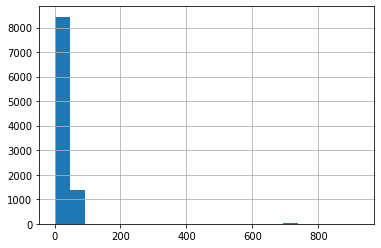

In [7]:
# check out customer age with a histogram
dirtydata['CustomerAge'].hist(bins=20)

In [8]:
# look at details of LenenovaLaptop
dirtydata.LenevoLaptop.describe()

count    9976.000000
mean        0.629711
std         0.627375
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: LenevoLaptop, dtype: float64

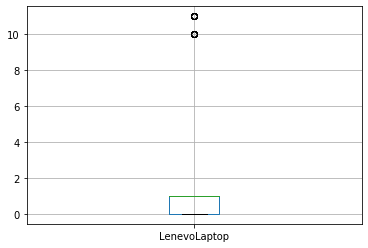

In [9]:
dirtydata.boxplot(column='LenevoLaptop')

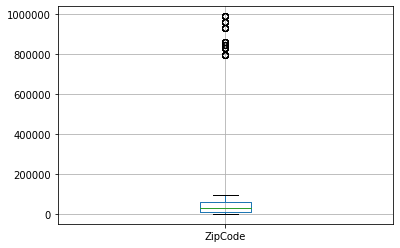

In [10]:
# look at zip codes
dirtydata.boxplot(column='ZipCode')


### Lets clean the dirty/messy data in the dirtydata dataframe object

You need to write your python code such that:
1. rows/records/tuples/transactions in the data frame that have missing values for fields/columns will be removed
2. rows/records/tuples/transactions in the data frame that have invalid/abnormal values for fields/columns will be removed

Examples of invalid/dirty/messy data:
  1. NaN values in the dataframe (Blank/Empty cells in the CSV file)

  2. Every product has a value 1 which means bought or 0 which means NOT bought; values like 11, 10, 9 are examples of invalid data

  3. CustomerAge value range could be from 18 to 100; values like 723, 634 are examples of invalid data
  
  4. Zipcode should have at least 5 digits


In [11]:
# what is the shape of cleandata before manipulating it?
dirtydata.shape

# Drop the NaN values - remember that dropna will make a new copy of the dataframe
cleandata = dirtydata.dropna()
# how did this affect the data?
cleandata.shape

# Do you see NaN values dropped below?
cleandata.head()
cleandata.dtypes

(10000, 34)

(9432, 34)

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1,1,0,0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1,0,0,1,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
3,60616.0,56.0,0,1,1,1,0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
5,2108.0,55.0,1,1,1,1,10,0.0,0.0,0.0,...,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0
6,90033.0,44.0,1,1,1,1,0,0.0,0.0,0.0,...,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1


ZipCode               float64
CustomerAge           float64
SamsungTV46LED          int64
SonyTV42LED            object
XBOX360                object
DellLaptop             object
BoseSoundSystem        object
BoseHeadSet           float64
SonyHeadSet           float64
iPod                  float64
iPhone                float64
Panasonic50LED        float64
SonyPS4               float64
WiiU                  float64
WDexternalHD          float64
SamsungTV55LED        float64
SonyTV60LED           float64
SandiskMemoryCard     float64
SonySoundSystem       float64
SonyCamera              int64
PanasonicCamera         int64
HPPrinter             float64
SonyDVDplayer         float64
ToshibaDVDplayer      float64
GalaxyTablet            int64
SurfaceTablet         float64
HPLaptop              float64
HDMICable             float64
SpeakerCable          float64
CallOfDutyGame        float64
GrandTheftAutoGame    float64
ASUSLaptop            float64
LenevoLaptop          float64
TVStandWal

In [12]:
# ----------------------------------------------------------------------------------

# Add the rest of your code here to clean the data

# steps you must take
# - eliminate NA's
# - product values should only be either a 0 or a 1
# - customer's age needs to be valid
# - zipcodes should have at least 5 digits
# - all numbers should be integers

# Optional steps
# - if there are other things you want to clean, clearly document them
#   and run them in this section before you create a database


# ----------------------------------------------------------------------------------
#converting all columns to integers
inttypeints = ['ZipCode','CustomerAge','SamsungTV46LED', 'SonyTV42LED', 'XBOX360', 'DellLaptop', 'BoseSoundSystem', 'BoseHeadSet', 'SonyHeadSet', 'iPod', 'iPhone', 'Panasonic50LED', 
                 'SonyPS4', 'WiiU','WDexternalHD', 'SamsungTV55LED', 'SonyTV60LED', 'SandiskMemoryCard', 'SonySoundSystem', 'SonyCamera', 'PanasonicCamera',
                'HPPrinter', 'SonyDVDplayer','ToshibaDVDplayer', 'GalaxyTablet', 'SurfaceTablet', 'HPLaptop', 'HDMICable', 'SpeakerCable',
                'CallOfDutyGame', 'GrandTheftAutoGame', 'ASUSLaptop','LenevoLaptop', 'TVStandWallMount']
cleandata[inttypeints] = cleandata[inttypeints].apply(pd.to_numeric, errors= 'coerce', axis = 1).dropna()
cleandata = cleandata[inttypeints].dropna().astype(int)
fivebool = cleandata['ZipCode'].astype(str).map(len) == 5 
cleandata = cleandata[fivebool]
zerobool = cleandata['CustomerAge'].astype(int) > 0
cleandata = cleandata[zerobool]
#Keep all ages lesst than or equal to 122
agebool = (cleandata['CustomerAge'].astype(int) <= 122) 
cleandata = cleandata[agebool]
#Keep everything thats either 1 or 0 product value
prodbool = ((cleandata['SamsungTV46LED'].astype(int)) <= 1) & ((cleandata['SonyTV42LED'].astype(int)) <= 1) & ((cleandata['XBOX360'].astype(int)) <= 1) & ((cleandata['DellLaptop'].astype(int)) <= 1) &((cleandata['BoseSoundSystem'].astype(int)) <= 1) & ((cleandata['BoseHeadSet'].astype(int) <= 1)) & ((cleandata['SonyHeadSet'].astype(int) <= 1))  & ((cleandata['iPod'].astype(int) <= 1)) & ((cleandata['iPhone'].astype(int) <= 1))& ((cleandata['Panasonic50LED'].astype(int)) <= 1) & ((cleandata['SonyPS4'].astype(int)) <= 1) & ((cleandata['WiiU'].astype(int)) <= 1) & ((cleandata['WDexternalHD'].astype(int) <= 1))& ((cleandata['SamsungTV55LED'].astype(int) <= 1))& ((cleandata['SonyTV60LED'].astype(int) <= 1)) & ((cleandata['SandiskMemoryCard'].astype(int) <= 1)) & ((cleandata['SonySoundSystem'].astype(int) <= 1)) & ((cleandata['SonyCamera'].astype(int) <= 1)) & ((cleandata['PanasonicCamera'].astype(int) <= 1)) & ((cleandata['HPPrinter'].astype(int) <= 1)) & ((cleandata['SonyDVDplayer'].astype(int) <= 1))  & ((cleandata['ToshibaDVDplayer'].astype(int) <= 1)) & ((cleandata['GalaxyTablet'].astype(int) <= 1)) & ((cleandata['SurfaceTablet'].astype(int) <= 1)) & ((cleandata['HPLaptop'].astype(int) <= 1)) & ((cleandata['HDMICable'].astype(int) <= 1)) & ((cleandata['SpeakerCable'].astype(int) <= 1)) & ((cleandata['CallOfDutyGame'].astype(int) <= 1))& ((cleandata['GrandTheftAutoGame'].astype(int) <= 1))& ((cleandata['ASUSLaptop'].astype(int) <= 1)) & ((cleandata['LenevoLaptop'].astype(int) <= 1)) & ((cleandata['TVStandWallMount'].astype(int) <= 1))                                                                                             
cleandata = cleandata[prodbool]
cleandata.dtypes

cleandata.describe()



/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


ZipCode               int64
CustomerAge           int64
SamsungTV46LED        int64
SonyTV42LED           int64
XBOX360               int64
DellLaptop            int64
BoseSoundSystem       int64
BoseHeadSet           int64
SonyHeadSet           int64
iPod                  int64
iPhone                int64
Panasonic50LED        int64
SonyPS4               int64
WiiU                  int64
WDexternalHD          int64
SamsungTV55LED        int64
SonyTV60LED           int64
SandiskMemoryCard     int64
SonySoundSystem       int64
SonyCamera            int64
PanasonicCamera       int64
HPPrinter             int64
SonyDVDplayer         int64
ToshibaDVDplayer      int64
GalaxyTablet          int64
SurfaceTablet         int64
HPLaptop              int64
HDMICable             int64
SpeakerCable          int64
CallOfDutyGame        int64
GrandTheftAutoGame    int64
ASUSLaptop            int64
LenevoLaptop          int64
TVStandWallMount      int64
dtype: object

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
count,7338.000000,7338.000000,7338.000000,7338.000000,7338.000000,7338.000000,7338.000000,7338.000000,7338.000000,7338.000000,...,7338.000000,7338.000000,7338.0,7338.000000,7338.000000,7338.000000,7338.000000,7338.000000,7338.000000,7338.000000
mean,48566.889888,35.196239,0.654265,0.810439,0.812210,0.514582,0.502317,0.510357,0.849550,0.180294,...,0.712456,0.064459,1.0,0.511720,0.678114,0.702099,0.334424,0.592668,0.622922,0.685745
std,26008.457798,10.146813,0.475640,0.391980,0.390571,0.499821,0.500029,0.499927,0.357536,0.384459,...,0.452648,0.245586,0.0,0.499897,0.467231,0.457367,0.471821,0.491371,0.484688,0.464250
min,10065.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30134.000000,27.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33130.000000,34.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,60616.000000,43.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,94158.000000,61.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
#Keep all ages lesst than or equal to 122
agebool = (cleandata['CustomerAge'].astype(int) <= 122) 
cleandata = cleandata[agebool]
#Keep everything thats either 1 or 0 product value
prodbool = ((cleandata['SamsungTV46LED'].astype(int)) <= 1) & ((cleandata['SonyTV42LED'].astype(int)) <= 1) & ((cleandata['XBOX360'].astype(int)) <= 1) & ((cleandata['DellLaptop'].astype(int)) <= 1) &((cleandata['BoseSoundSystem'].astype(int)) <= 1) & ((cleandata['BoseHeadSet'].astype(int) <= 1)) & ((cleandata['SonyHeadSet'].astype(int) <= 1))  & ((cleandata['iPod'].astype(int) <= 1)) & ((cleandata['iPhone'].astype(int) <= 1))& ((cleandata['Panasonic50LED'].astype(int)) <= 1) & ((cleandata['SonyPS4'].astype(int)) <= 1) & ((cleandata['WiiU'].astype(int)) <= 1) & ((cleandata['WDexternalHD'].astype(int) <= 1))& ((cleandata['SamsungTV55LED'].astype(int) <= 1))& ((cleandata['SonyTV60LED'].astype(int) <= 1)) & ((cleandata['SandiskMemoryCard'].astype(int) <= 1)) & ((cleandata['SonySoundSystem'].astype(int) <= 1)) & ((cleandata['SonyCamera'].astype(int) <= 1)) & ((cleandata['PanasonicCamera'].astype(int) <= 1)) & ((cleandata['HPPrinter'].astype(int) <= 1)) & ((cleandata['SonyDVDplayer'].astype(int) <= 1))  & ((cleandata['ToshibaDVDplayer'].astype(int) <= 1)) & ((cleandata['GalaxyTablet'].astype(int) <= 1)) & ((cleandata['SurfaceTablet'].astype(int) <= 1)) & ((cleandata['HPLaptop'].astype(int) <= 1)) & ((cleandata['HDMICable'].astype(int) <= 1)) & ((cleandata['SpeakerCable'].astype(int) <= 1)) & ((cleandata['CallOfDutyGame'].astype(int) <= 1))& ((cleandata['GrandTheftAutoGame'].astype(int) <= 1))& ((cleandata['ASUSLaptop'].astype(int) <= 1)) & ((cleandata['LenevoLaptop'].astype(int) <= 1)) & ((cleandata['TVStandWallMount'].astype(int) <= 1))                                                                                             
cleandata = cleandata[prodbool]

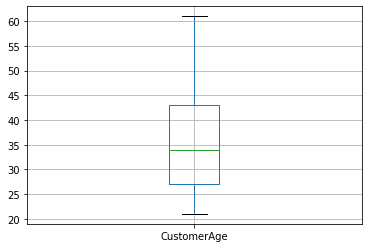

In [14]:
# after cleaning the customer age - does the boxplot still show outliers?
# how does the histogram look?
# if this does not look better - you are not ready to proceed
cleandata.boxplot(column='CustomerAge')


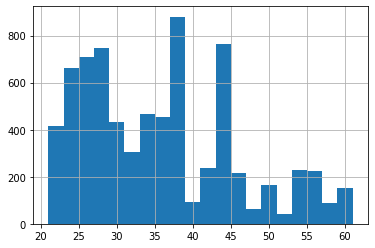

In [15]:
cleandata['CustomerAge'].hist(bins=20)

### Lets store the cleaned data into the Database

In [16]:
# how many records did you end up with after the data cleaning?
cleandata.shape

(7338, 34)

In [17]:
# now that your data has been cleaned, lets store it in a database

# NOTE - the parameters to replace an existing database if it already exists

engine = create_engine('sqlite:///bestdeal.db')

In [18]:
cleandata.to_sql('trans4cust', engine, if_exists = 'replace', index = False)

** Sanity Test: Did it create the table in bestdeal.db?  Check!!**

In [19]:
insp = inspect(engine)

In [20]:
 insp.get_table_names()

['trans4cust']

In [21]:
pd.read_sql_table('trans4cust', engine).columns

Index(['ZipCode', 'CustomerAge', 'SamsungTV46LED', 'SonyTV42LED', 'XBOX360',
       'DellLaptop', 'BoseSoundSystem', 'BoseHeadSet', 'SonyHeadSet', 'iPod',
       'iPhone', 'Panasonic50LED', 'SonyPS4', 'WiiU', 'WDexternalHD',
       'SamsungTV55LED', 'SonyTV60LED', 'SandiskMemoryCard', 'SonySoundSystem',
       'SonyCamera', 'PanasonicCamera', 'HPPrinter', 'SonyDVDplayer',
       'ToshibaDVDplayer', 'GalaxyTablet', 'SurfaceTablet', 'HPLaptop',
       'HDMICable', 'SpeakerCable', 'CallOfDutyGame', 'GrandTheftAutoGame',
       'ASUSLaptop', 'LenevoLaptop', 'TVStandWallMount'],
      dtype='object')

### Now we are ready to query the Database

#### Query example #1: get the transactions for the customers in zipCode 60616

In [22]:
# ======================================================================
# **********************************************************************
# 
# WARNING - this pre-run notebook is using dirty data
# WARNING - after cleaning the data, your output should look different
#
# ======================================================================
# **********************************************************************

In [23]:
q1 = pd.read_sql_query("SELECT * \
                FROM trans4cust \
                WHERE ZipCode='60616'", engine)

q1.head()

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,60616,56,0,1,1,1,0,0,1,1,...,0,0,1,0,1,0,0,1,0,0
1,60616,43,0,1,1,0,1,0,1,0,...,1,0,1,1,1,1,0,1,1,1
2,60616,54,1,0,0,1,0,1,1,0,...,0,1,1,0,1,1,0,1,1,1
3,60616,43,1,1,1,0,1,1,1,0,...,1,1,1,1,0,1,0,1,1,1
4,60616,31,0,1,1,1,0,0,1,1,...,1,0,1,1,1,1,1,0,0,1


#### Query example #2: get the transactions for ALL customers

In [24]:
q2 = pd.read_sql_query("SELECT * \
                FROM trans4cust", engine)

q2.head()

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134,35,1,1,1,0,0,1,1,0,...,1,0,1,1,1,1,0,1,1,1
1,62791,43,0,1,0,0,1,0,1,0,...,1,0,1,0,1,1,0,1,1,1
2,60616,56,0,1,1,1,0,0,1,1,...,0,0,1,0,1,0,0,1,0,0
3,90033,44,1,1,1,1,0,0,0,0,...,1,1,1,1,0,1,1,0,0,1
4,62791,27,1,1,0,1,0,0,0,0,...,1,1,1,0,0,1,0,1,1,1


#### Query example #3: get the number of customers in every ZipCode sorted by ZipCode

In [25]:
q3 = pd.read_sql_query("SELECT ZipCode , COUNT(*) as 'num_customers' \
            FROM trans4cust \
            GROUP BY ZipCode \
            ORDER BY ZipCode", engine)

q3.head()

,ZipCode,num_customers
0,10065,750
1,30134,1133
2,30303,985
3,33129,531
4,33130,280


#### Query example #4: get the number of customers for  every Age Group in ZipCode 60616 sorted by CustomerAge

In [26]:
q4 = pd.read_sql_query(
        "SELECT CustomerAge , COUNT(*) as 'num_customers' \
        FROM trans4cust \
        WHERE ZipCode=60616 \
        GROUP BY CustomerAge  \
        ORDER BY CustomerAge", engine)

q4.head()

,CustomerAge,num_customers
0,21,56
1,22,32
2,23,40
3,25,88
4,26,48


#### Query example #5: Plot in a stacked-bar figure the number of customers who bought SonyTV60LED and/or BoseSoundSystem in  every zipcode that has more than 400 customers who bought these two products(either bought one of these products or the two products)

In [27]:
SonyTV60LEDCustTrans = pd.read_sql_query(
    "SELECT ZipCode , COUNT(*) as 'num_customers' \
    FROM trans4cust \
    WHERE SonyTV60LED=1  \
    GROUP BY ZipCode \
    HAVING COUNT(*) > 400", engine)

BoseSoundSystemCustTrans = pd.read_sql_query(
    "SELECT ZipCode , COUNT(*) as 'num_customers'\
    FROM trans4cust \
    WHERE BoseSoundSystem=1 \
    GROUP BY ZipCode \
    HAVING COUNT(*) > 400", engine)

In [28]:
SonyTV60LEDCustTrans

,ZipCode,num_customers
0,10065,439
1,30134,757
2,30303,517
3,60616,689


In [29]:
BoseSoundSystemCustTrans

,ZipCode,num_customers
0,30134,799
1,30303,464
2,60616,466
3,90033,404


In [30]:
SonyTV60LEDCustTrans.ZipCode


0    10065
1    30134
2    30303
3    60616
Name: ZipCode, dtype: int64

In [31]:
import numpy

#   There are zipcodes that Sony got bought but not Bose 
#   but there are also zipcodes that Bose got bought but not Sony
#
#   AND we need to use stacked-bar graph and we have a potentially asymmetrical set  of zipcode values
#   So, we need to do somework to create the symmteric set of zipcode values for Sony and Bose


sonyZipCodeTuples = tuple(SonyTV60LEDCustTrans.ZipCode.astype(numpy.int))
sony_num_customersTuples = tuple(SonyTV60LEDCustTrans.num_customers.astype(numpy.int))

boseZipCodeTuples = tuple(BoseSoundSystemCustTrans.ZipCode.astype(numpy.int))
bose_num_customersTuples = tuple(BoseSoundSystemCustTrans.num_customers.astype(numpy.int))

sony_dict = dict(zip(sonyZipCodeTuples, sony_num_customersTuples))
bose_dict = dict(zip(boseZipCodeTuples, bose_num_customersTuples))

for key in bose_dict.keys():
    if ((key in sony_dict.keys()) == False): sony_dict[key]=0
        
for key in sony_dict.keys():
    if ((key in bose_dict.keys()) == False): bose_dict[key]=0
        
bose_zip = sorted(bose_dict.keys())

sony_zip = sorted(sony_dict.keys())

bose_zip_tuple = tuple(bose_zip)

sony_zip_tuple = tuple(sony_zip)

bose_customer_list = []

for bose in bose_zip_tuple:
    bose_customer_list.append(bose_dict[bose])

sony_customer_list = []

for sony in sony_zip_tuple:
    sony_customer_list.append(sony_dict[sony])

bose_customer_tuple = tuple(bose_customer_list)
sony_customer_tuple = tuple(sony_customer_list)


Text(0, 0.5, 'Number of Customers')

Text(0.5, 0, 'Zip Code')

Text(0.5, 1.0, 'Number of Customers by ZipCode and 2 Products')

([<matplotlib.axis.XTick at 0x123b00250>,
 <a list of 5 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x123aff310>,
 <a list of 20 Text yticklabel objects>)

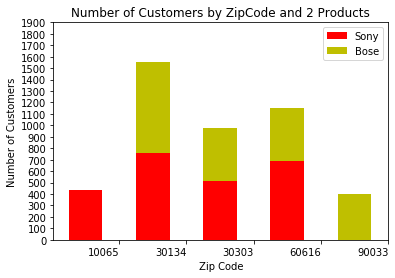

In [32]:
# See docs for bar_stack at the URL
# http://matplotlib.org/examples/pylab_examples/bar_stacked.html

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

ind = np.arange(len(sony_customer_tuple))    

# the width of the bars: can also be len(x) sequence
width = .5

p1 = plt.bar(ind, sony_customer_tuple, width,  color='r')
p2 = plt.bar(ind, bose_customer_tuple, width, color='y', bottom=sony_customer_tuple)

plt.ylabel('Number of Customers')
plt.xlabel('Zip Code')

plt.title('Number of Customers by ZipCode and 2 Products')

plt.xticks(ind + width, sony_zip_tuple, horizontalalignment='right')

plt.yticks(np.arange(0, 2000, 100))
plt.legend((p1[0], p2[0]), ('Sony', 'Bose'))

plt.show()

<div class="alert alert-block alert-warning">
    
# Requirements :

Answer the homework questions below; add cells as needed.

</div>

### Requirement 1 (5 points)

Show the shape of your data and the variable types of your data. You will get points for clean data - no NA's, product values of only 0 or 1, valid customer ages, zipcodes with 5 digits.

In [33]:
cleandata.shape

(7338, 34)

### Requirement 2 (5 points) - Use SQL/SQLite

a) Show the top 3 zip codes with the most customers.  <br>
b) Using just the top 3 zip codes, what are the ages of the customers? Sort the output by highest count on top.

In [34]:
pd.read_sql_query(
    "SELECT ZipCode , COUNT(CustomerAge) as 'num_customers' \
    FROM trans4cust \
    GROUP BY ZipCode \
    ORDER BY num_customers DESC\
    LIMIT 3 ", engine)

,ZipCode,num_customers
0,30134,1133
1,30303,985
2,60616,951


A.) The top three zips are 30134, 30303, and 60616.

In [46]:
pd.read_sql_query(
    "SELECT ZipCode, CustomerAge, COUNT(CustomerAge) as 'num_customers' \
    FROM trans4cust  \
    WHERE ZipCode IN (30134,30303, 60616)\
    GROUP BY ZipCode, CustomerAge\
    ORDER BY num_customers DESC", engine)


,ZipCode,CustomerAge,num_customers
0,30134,25,154
1,60616,34,96
2,60616,25,88
3,60616,44,87
4,30134,29,84
...,...,...,...
72,30134,26,2
73,30134,33,2
74,30134,39,2
75,30134,59,2


### Requirement 3 (5 points) - Use SQL/SQLite

Get the number of customers that bought both a DellLaptop and HPPrinter. Show the results for every age and sort the output by age so that the oldest customers are shown at the top.

In [367]:
pd.read_sql_query(
    "SELECT CustomerAge, COUNT(CustomerAge) \
    FROM trans4cust  \
    WHERE DellLaptop = 1 AND HPPrinter = 1\
    GROUP BY CustomerAge \
    ORDER BY CustomerAge DESC", engine)

,CustomerAge,COUNT(CustomerAge)
0,61,32
1,59,80
2,57,25
3,56,162
4,54,108
5,53,10
6,51,7
7,47,32
8,46,33
9,45,32


### Requirement 4 (5 points) - Use SQL/SQLite

a) How many customers are in the 25 and under group? <br>
b) Of these customers, how many iPods were purchased? How many CallOfDutyGame were purchased? <br>
c) How many customers are in the 55 and over group? <br>
d) Of these customers, how many iPods were purchased? How many CallOfDutyGame were purchased? <br>

In [368]:
pd.read_sql_query(
    "SELECT COUNT(CustomerAge) as num_age\
    FROM trans4cust  \
    WHERE CustomerAge < 26", engine)

,num_age
0,1504


A.) The number of customers in 25 and under group are 1,504.

In [382]:
pd.read_sql_query(
    "SELECT COUNT (iPod) as iPodcount \
    FROM trans4cust  \
    WHERE CustomerAge < 26 AND (iPod = 1)", engine)

pd.read_sql_query(
    "SELECT COUNT (CallOfDutyGame) as GameCount\
    FROM trans4cust  \
    WHERE CustomerAge < 26 AND (CallOfDutyGame = 1)", engine)

,iPodcount
0,243


,GameCount
0,1379


B.) The number customers who purchased iPods were 243, and CallofDutyGame were 1379.

In [370]:
pd.read_sql_query(
    "SELECT COUNT(CustomerAge) as num_age\
    FROM trans4cust  \
    WHERE CustomerAge > 54", engine)

,num_age
0,467


C.) The number of customers in 55 and older are 467.

In [371]:
pd.read_sql_query(
    "SELECT SUM(iPod) as iPodcount, SUM(CallOfDutyGame) as CallOfDutyGamecount \
    FROM trans4cust  \
    WHERE CustomerAge > 54 AND (iPod = 1 OR CallOfDutyGame = 1)", engine)

,iPodcount,CallOfDutyGamecount
0,266,305


D.) The number of customer in 55 and older who purchased iPods were 266, and CallofDuty were 305.

### Requirement 5 (10 points) - Use SQL/SQLite
 
Plot in a stacked-bar figure the number of customers who bought HPLaptop and/or HPPrinter but did NOT buy WDexternalHD for every CustomerAge group that has more than 100 customers who bought these two products(either bought one of these products or the two products but didn't buy WDexternalHD).

In [372]:
HPLapCustTrans = pd.read_sql_query(
    "SELECT CustomerAge , COUNT(*) as 'num_customers' \
    FROM trans4cust \
    WHERE HPLaptop=1 AND WDexternalHD = 0 \
    GROUP BY CustomerAge \
    HAVING COUNT(*) > 100", engine)

HPPrintCustTrans = pd.read_sql_query(
    "SELECT CustomerAge , COUNT(*) as 'num_customers'\
    FROM trans4cust \
    WHERE HPPrinter=1 AND WDexternalHD = 0 \
    GROUP BY CustomerAge \
    HAVING COUNT(*) > 100", engine)



In [373]:
import numpy

#   There are custages that HPLap got bought but not HPPrint
#   but there are also custages that HPPrint got bought but not HPLap
#
#   AND we need to use stacked-bar graph and we have a potentially asymmetrical set  of custages values
#   So, we need to do somework to create the symmteric set of custages values for HPLAP and HPPrint


HPLapCustTransCustAgeTuples = tuple(HPLapCustTrans.CustomerAge.astype(numpy.int))
HPLapCustTranscustomersTuples = tuple(HPLapCustTrans.num_customers.astype(numpy.int))

HPPrintCustTransTuples = tuple(HPPrintCustTrans.CustomerAge.astype(numpy.int))
HPPrintCustTranscustomersTuples = tuple(HPPrintCustTrans.num_customers.astype(numpy.int))

HPLapCustTrans_dict = dict(zip(HPLapCustTransCustAgeTuples, HPLapCustTranscustomersTuples))
HPPrintCustTrans_dict = dict(zip(HPPrintCustTransTuples, HPPrintCustTranscustomersTuples))

for key in HPPrintCustTrans_dict.keys():
    if ((key in HPLapCustTrans_dict.keys()) == False): HPLapCustTrans_dict[key]=0
        
for key in HPLapCustTrans_dict.keys():
    if ((key in HPPrintCustTrans_dict.keys()) == False): HPPrintCustTrans_dict[key]=0
        
HPPrint_zip = sorted(HPPrintCustTrans_dict.keys())

HPLap_zip = sorted(HPLapCustTrans_dict.keys())

HPPrint_zip_tuple = tuple(HPPrint_zip)

HPLap_zip_tuple = tuple(HPLap_zip)

HPPrint_customer_list = []

for HP in HPPrint_zip_tuple:
    HPPrint_customer_list.append(HPPrintCustTrans_dict[HP])

HPLap_customer_list = []

for LAP in HPLap_zip_tuple:
    HPLap_customer_list.append(HPLapCustTrans_dict[LAP])

HPPrint_customer_tuple = tuple(HPPrint_customer_list)
HPLap_customer_tuple = tuple(HPLap_customer_list)


Text(0, 0.5, 'Number of Customers')

Text(0.5, 0, 'CustomerAge')

Text(0.5, 1.0, 'Number of Customers by CustomerAge and 2 Products')

([<matplotlib.axis.XTick at 0x12a12fed0>,
 <a list of 17 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x128a20950>,
 <a list of 20 Text yticklabel objects>)

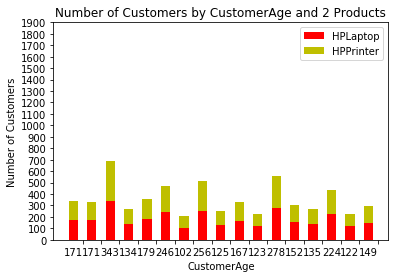

In [374]:
# See docs for bar_stack at the URL
# http://matplotlib.org/examples/pylab_examples/bar_stacked.html

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

ind = np.arange(len(HPLap_customer_tuple))    

# the width of the bars: can also be len(x) sequence
width = .5

p1 = plt.bar(ind,HPLap_customer_tuple , width,  color='r')
p2 = plt.bar(ind, HPPrint_customer_tuple, width, color='y', bottom=HPLap_customer_tuple)

plt.ylabel('Number of Customers')
plt.xlabel('CustomerAge')

plt.title('Number of Customers by CustomerAge and 2 Products')

plt.xticks(ind + width,HPLap_customer_tuple , horizontalalignment='right')

plt.yticks(np.arange(0, 2000, 100))
plt.legend((p1[0], p2[0]), ('HPLaptop', 'HPPrinter'))

plt.show()